# Practical Application Assignment 17.1: Comparing Classifiers
#### Overview:
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

#### Data:
The dataset you will use comes from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)
. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

#### Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations. 

In [283]:
# see https://github.com/ahachani/Comparing_Classifiers for the README.md

## CRISP-DM Framework

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Our first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  

### Business Understanding

The dataset pertains to direct marketing campaigns (phone calls) conducted by a Portuguese banking institution. The primary objective of these campaigns is to persuade clients to subscribe to a term deposit product. The classification goal is to predict whether a client will subscribe to a term deposit based on various attributes captured during the marketing campaigns.

#### Why This Matters

- **Marketing Efficiency**: By predicting which clients are more likely to subscribe, the bank can focus its marketing efforts on high-potential customers, thereby increasing conversion rates and reducing costs.

- **Customer Relationship Management**: Understanding the factors that influence a client's decision can help tailor personalized marketing strategies, improving customer satisfaction and loyalty.

- **Resource Allocation**: Efficient prediction allows for better allocation of resources such as time, budget, and manpower towards more receptive client segments.

#### Business Objectives

- **Predictive Modeling**: Develop accurate models to predict client subscription to term deposits.

- **Insight Generation**: Identify key factors influencing client decisions to optimize future marketing campaigns.

- **Performance Comparison**: Evaluate and compare different classification algorithms to determine the most effective model for this business problem.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  We will write down some steps that  would take to get to know the dataset and identify any quality issues within.  I will take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [290]:
from ucimlrepo import fetch_ucirepo 
# https://archive.ics.uci.edu/dataset/222/bank+marketing
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 


In [291]:
# Assuming 'dotdict_obj' is our dotdict object
dotdict_obj = bank_marketing.data  # Replace with your dotdict object

# Convert the dotdict object to a dictionary
#data_dict = dict(dotdict_obj)

# If the values of the dictionary are lists or arrays (common for datasets)
#df = pd.DataFrame(data_dict)


# Extract features and targets
features_df = dotdict_obj['features']
targets_df = dotdict_obj['targets']

# Combine features and targets into a single DataFrame
data = pd.concat([features_df, targets_df], axis=1)

# Optionally, display the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [304]:
# Load the dataset 
data_dict = bank_marketing.data
print(type(data_dict))
#data = pd.DataFrame(data_dict)
#data.info()

<class 'ucimlrepo.dotdict.dotdict'>


In [306]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
#print(bank_marketing.metadata) 
  
# variable information 
#print(bank_marketing.variables) 

#print(X)

In [307]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,<NA>,5,may,261,1,-1,0,<NA>,no
1,44,technician,single,secondary,no,29,yes,no,<NA>,5,may,151,1,-1,0,<NA>,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,<NA>,5,may,76,1,-1,0,<NA>,no
3,47,blue-collar,married,<NA>,no,1506,yes,no,<NA>,5,may,92,1,-1,0,<NA>,no
4,33,<NA>,single,<NA>,no,1,no,no,<NA>,5,may,198,1,-1,0,<NA>,no


In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  Int64 
 1   job          44923 non-null  string
 2   marital      45211 non-null  string
 3   education    43354 non-null  string
 4   default      45211 non-null  string
 5   balance      45211 non-null  Int64 
 6   housing      45211 non-null  string
 7   loan         45211 non-null  string
 8   contact      32191 non-null  string
 9   day_of_week  45211 non-null  Int64 
 10  month        45211 non-null  string
 11  duration     45211 non-null  Int64 
 12  campaign     45211 non-null  Int64 
 13  pdays        45211 non-null  Int64 
 14  previous     45211 non-null  Int64 
 15  poutcome     8252 non-null   string
 16  y            45211 non-null  string
dtypes: Int64(7), string(10)
memory usage: 6.2 MB


In [311]:
# Convert column types using convert_dtypes()
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  Int64 
 1   job          44923 non-null  string
 2   marital      45211 non-null  string
 3   education    43354 non-null  string
 4   default      45211 non-null  string
 5   balance      45211 non-null  Int64 
 6   housing      45211 non-null  string
 7   loan         45211 non-null  string
 8   contact      32191 non-null  string
 9   day_of_week  45211 non-null  Int64 
 10  month        45211 non-null  string
 11  duration     45211 non-null  Int64 
 12  campaign     45211 non-null  Int64 
 13  pdays        45211 non-null  Int64 
 14  previous     45211 non-null  Int64 
 15  poutcome     8252 non-null   string
 16  y            45211 non-null  string
dtypes: Int64(7), string(10)
memory usage: 6.2 MB


In [314]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,<NA>,5,may,261,1,-1,0,<NA>,no
1,44,technician,single,secondary,no,29,yes,no,<NA>,5,may,151,1,-1,0,<NA>,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,<NA>,5,may,76,1,-1,0,<NA>,no
3,47,blue-collar,married,<NA>,no,1506,yes,no,<NA>,5,may,92,1,-1,0,<NA>,no
4,33,<NA>,single,<NA>,no,1,no,no,<NA>,5,may,198,1,-1,0,<NA>,no


In [316]:
# Data describe
data.describe(include = 'string')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


In [318]:
for column in data.columns:
    unique_values_count = data[column].value_counts()
    print(f"\nUnique values count for {column}:")
    print(unique_values_count)


Unique values count for age:
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: Int64

Unique values count for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: Int64

Unique values count for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: Int64

Unique values count for education:
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: Int64

Unique values count for default:
default
no     44396
yes      815
Name: count, dtype: Int64

Unique values count for balance:
balance
0        3514
1         195
2         156
4         139
3         134
         ... 
-381        1
4617        1
20584 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, and any transformations that we believe should happen (scaling, logarithms, normalization, etc.).

In [320]:
# Perecentage of NaN values for each feature
for column in data.columns:
    print(f'Percent of missing {column} records is %.2f%%' %((data[column].isnull().sum()/data.shape[0])*100))

Percent of missing age records is 0.00%
Percent of missing job records is 0.64%
Percent of missing marital records is 0.00%
Percent of missing education records is 4.11%
Percent of missing default records is 0.00%
Percent of missing balance records is 0.00%
Percent of missing housing records is 0.00%
Percent of missing loan records is 0.00%
Percent of missing contact records is 28.80%
Percent of missing day_of_week records is 0.00%
Percent of missing month records is 0.00%
Percent of missing duration records is 0.00%
Percent of missing campaign records is 0.00%
Percent of missing pdays records is 0.00%
Percent of missing previous records is 0.00%
Percent of missing poutcome records is 81.75%
Percent of missing y records is 0.00%


In [ ]:
# Based on the percentage of missing values for each feature, here are the steps for handling the missing data:

In [322]:
# 1. Job (0.64% missing)
# Action: Impute the missing job values with the most frequent job category.
# Reason: The percentage of missing data is small, and imputing with the mode will likely preserve the overall distribution.

data['job'].fillna(data['job'].mode()[0], inplace=True)

In [324]:
# 2. Education (4.11% missing)
# Action: Impute the missing education values with the most frequent education category.
# Reason: While slightly higher, 4.11% is still a small percentage. Imputing with the mode is a straightforward approach 
# and will not drastically affect the dataset.

data['education'].fillna(data['education'].mode()[0], inplace=True)

In [326]:
# 3. Contact (28.80% missing)
# Action: Impute the missing contact values with a custom category, such as 'unknown'.
# Reason: Since a significant portion of the data is missing (nearly 29%), imputing with a new category like 'unknown' is appropriate 
# and allows us to retain the information that the contact type is not available.

data['contact'].fillna('unknown', inplace=True)

In [328]:
# 4. Poutcome (81.75% missing)
# Action: Consider dropping the poutcome feature or imputing it with a new category like 'unknown'.
# Reason: With over 80% of the data missing, the feature might not provide much value.

data['poutcome'].fillna('unknown', inplace=True)

In [330]:
# Check if there are any remaining missing values
print(data.isnull().sum())


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [332]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [334]:
# Check the number of records where the value is 0
zero_records = data.eq(0).sum()
zero_percentage = (zero_records / len(data)) * 100  # Calculate the percentage of zero values

# Display the number of zero records and their percentage
print(zero_records)
print("\n---------------------------------------\n")

# Calculate the percentage of zero values for each column
for column in data.columns:
    zero_percentage = (data[column].eq(0).sum() / data.shape[0]) * 100
    print(f'Percent of zero {column} records is %.2f%%' % zero_percentage)

#print(zero_percentage)

age                0
job                0
marital            0
education          0
default            0
balance         3514
housing            0
loan               0
contact            0
day_of_week        0
month              0
duration           3
campaign           0
pdays              0
previous       36954
poutcome           0
y                  0
dtype: Int32

---------------------------------------

Percent of zero age records is 0.00%
Percent of zero job records is 0.00%
Percent of zero marital records is 0.00%
Percent of zero education records is 0.00%
Percent of zero default records is 0.00%
Percent of zero balance records is 7.77%
Percent of zero housing records is 0.00%
Percent of zero loan records is 0.00%
Percent of zero contact records is 0.00%
Percent of zero day_of_week records is 0.00%
Percent of zero month records is 0.00%
Percent of zero duration records is 0.01%
Percent of zero campaign records is 0.00%
Percent of zero pdays records is 0.00%
Percent of zero previ

In [336]:
# Handling Zero Values

In [338]:
#### 1. Balance Feature

#### Action
- We will keep the zero values as they represent clients with no current balance.
##### Analysis
- We will investigate whether clients with zero balance are more or less likely to subscribe.
- We will Use visualization tools (e.g., histograms, box plots) to compare subscription rates between clients with zero and non-zero balances.
##### Feature Engineering
- We will consider creating a binary feature indicating whether the balance is zero or not.

In [341]:
#### 2. Duration Feature

##### Action
- We will exclude the `duration` feature from your predictive modeling.
###### Reasoning
- Including `duration` can lead to unrealistic model performance because it is highly correlated with the target variable and is not available before making a call.
- For realistic predictive models, `duration` should not be used.
###### Alternative Use
- We can include `duration` in exploratory analysis to understand its effect but we will avoid using it in the final model.

In [344]:
#### 3. Previous Feature

##### Action
- We will retain the `previous` feature but consider its distribution.
###### Analysis
- Since 81.74% of values are zero, we will assess whether this feature contributes to the predictive power of the model.
- We will perform statistical tests to determine if there's a significant difference in subscription rates between clients with zero and non-zero previous contacts.
###### Feature Engineering

- I will create a binary feature:
  - `previous_contacted = 0` if `previous == 0`
  - `previous_contacted = 1` if `previous > 0`
- This transformation may help the model better capture the impact of previous contacts.

In [347]:
#### Decisons for next steps:

#### Zero Values are Informative
- The zero values in `balance` and `previous` are meaningful and should be retained, possibly with some feature engineering.
#### We will Exclude `duration` from Modeling
- To maintain the realism and validity of your predictive model, we will exclude `duration`.
#### EDA is Crucial
- We will pPerform thorough exploratory analysis to understand the impact of these features on the target variable.
#### Feature Engineering Enhances Models
- We will be creating new features or transforming existing ones can improve model performance.

In [350]:
# 1. we will Retain Zero Values in 'balance' and 'previous'
# No action needed since we're keeping them as they are.

# 2. Feature Engineering

## Creation a binary feature indicating whether the 'balance' is zero or not
data['balance_zero'] = np.where(data['balance'] == 0, 1, 0)

## Creation a binary feature indicating whether the client was previously contacted
data['previous_contacted'] = np.where(data['previous'] > 0, 1, 0)

# 3. we will Exclude 'duration' from Modeling

## we will Drop the 'duration' column from the dataset
data.drop(columns=['duration'], inplace=True)

Subscription Rates by Zero Balance:
y                   no       yes
balance_zero                    
0             0.880159  0.119841
1             0.916904  0.083096


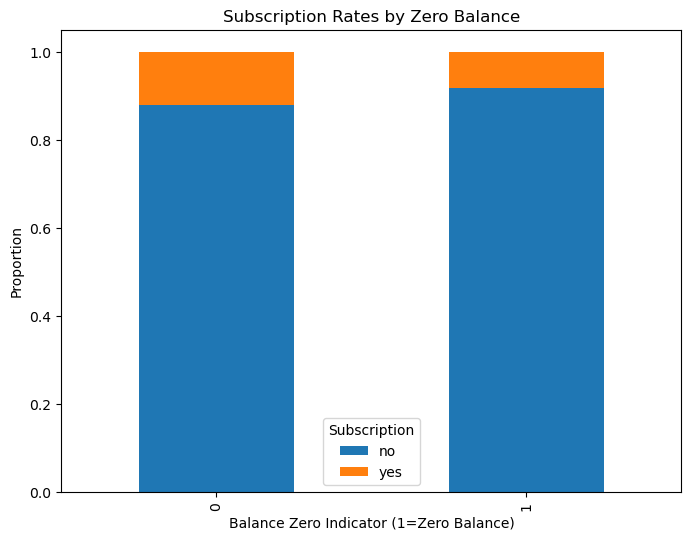

In [69]:
# 4. Exploratory Data Analysis (EDA)

## Investigation whether clients with zero balance are more or less likely to subscribe

### Calculation of subscription rates for clients with zero and non-zero balances
subscription_rates_balance = data.groupby('balance_zero')['y'].value_counts(normalize=True).unstack()

### Print subscription rates
print("Subscription Rates by Zero Balance:")
print(subscription_rates_balance)

### Visualize the subscription rates
subscription_rates_balance.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Subscription Rates by Zero Balance')
plt.xlabel('Balance Zero Indicator (1=Zero Balance)')
plt.ylabel('Proportion')
plt.legend(title='Subscription', loc='best')
plt.show()

In [ ]:
# Clients who were previously contacted have a significantly higher subscription rate (28.76%) compared to those who were not previously contacted (11.07%).
# This suggests that previous interactions with clients may positively influence their likelihood of subscribing to a term deposit.

Subscription Rates by Previous Contact Indicator:
y                         no       yes
previous_contacted                    
0                   0.908427  0.091573
1                   0.769287  0.230713


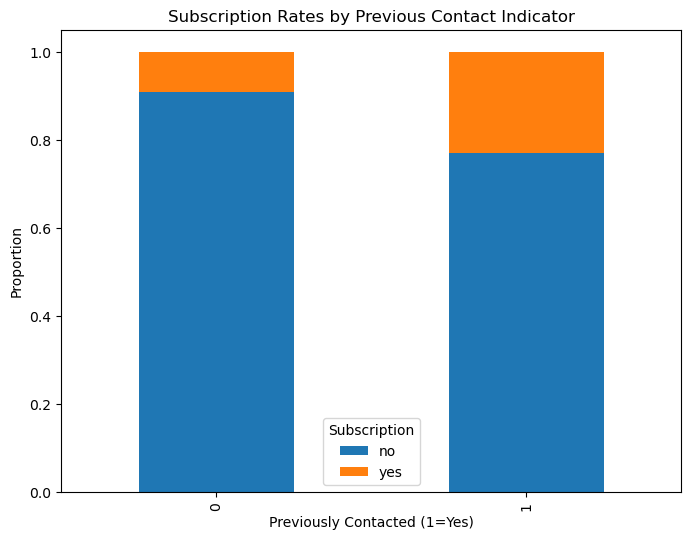

In [71]:
### Calculation of subscription rates based on previous contact
subscription_rates_previous = data.groupby('previous_contacted')['y'].value_counts(normalize=True).unstack()

### Print subscription rates
print("Subscription Rates by Previous Contact Indicator:")
print(subscription_rates_previous)

### Visualize the subscription rates
subscription_rates_previous.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Subscription Rates by Previous Contact Indicator')
plt.xlabel('Previously Contacted (1=Yes)')
plt.ylabel('Proportion')
plt.legend(title='Subscription', loc='best')
plt.show()


In [ ]:
# The data clearly shows that clients who have been previously contacted are more likely to subscribe to a term deposit. 
# By recognizing the importance of building ongoing relationships with clients, the bank can:

# We will iImprove Conversion Rates: Focus efforts on clients with prior contact history.
# We will Optimize Marketing Spend: Allocate resources more effectively by targeting receptive audiences.
# We will Enhance Customer Experience: Develop strategies that value long-term client engagement.

#Next Steps:

# We will integrate Findings into Modeling:

# We will Ensure that the previous_contacted feature is included in predictive models.
# We will Analyze feature importance to quantify its impact.

# Strategic Planning:

# we will Incorporate these insights into the bank's overall marketing and customer relationship management strategies.


In [67]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y,balance_zero,previous_contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,0,0


#### Explanation:
One-Hot Encoding: Applied to job, marital, education, and poutcome to convert these categorical variables into binary columns.
Binary Encoding: Used for default, housing, and loan since these features are binary.
Ordinal Encoding: Applied to contact and month to represent the natural ordering (if applicable).
Numerical Features: age, balance, duration, campaign, pdays, and previous remain unchanged as they are already numerical.

In [73]:
# One-Hot Encoding
one_hot_columns = ['job', 'marital', 'education', 'poutcome']
data_encoded = pd.get_dummies(data, columns=one_hot_columns)

# Binary Encoding
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map({'no': 0, 'yes': 1})

# Ordinal Encoding for 'contact' and 'month'
ordinal_encoders = {
    'contact': {'unknown': 0, 'cellular': 1, 'telephone': 2},
    'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
}

for col, mapping in ordinal_encoders.items():
    data_encoded[col] = data_encoded[col].map(mapping)

data_encoded.head()

,age,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,5,5,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,0,5,5,1,-1,...,False,False,True,False,True,False,False,False,False,True
2,33,0,2,1,1,0,5,5,1,-1,...,False,True,False,False,True,False,False,False,False,True
3,47,0,1506,1,0,0,5,5,1,-1,...,False,True,False,False,True,False,False,False,False,True
4,33,0,1,0,0,0,5,5,1,-1,...,False,False,True,False,True,False,False,False,False,True


In [75]:
# Split the data into features (X) and target variable (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

In [77]:
X.head()

,age,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,5,5,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,0,5,5,1,-1,...,False,False,True,False,True,False,False,False,False,True
2,33,0,2,1,1,0,5,5,1,-1,...,False,True,False,False,True,False,False,False,False,True
3,47,0,1506,1,0,0,5,5,1,-1,...,False,True,False,False,True,False,False,False,False,True
4,33,0,1,0,0,0,5,5,1,-1,...,False,False,True,False,True,False,False,False,False,True


In [79]:
# Convert boolean columns to integers (0s and 1s)
X = X.astype(int)

X.head(40)

,age,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,5,5,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,0,5,5,1,-1,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,0,5,5,1,-1,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,0,5,5,1,-1,...,0,1,0,0,1,0,0,0,0,1
4,33,0,1,0,0,0,5,5,1,-1,...,0,0,1,0,1,0,0,0,0,1
5,35,0,231,1,0,0,5,5,1,-1,...,0,1,0,0,0,1,0,0,0,1
6,28,0,447,1,1,0,5,5,1,-1,...,0,0,1,0,0,1,0,0,0,1
7,42,1,2,1,0,0,5,5,1,-1,...,1,0,0,0,0,1,0,0,0,1
8,58,0,121,1,0,0,5,5,1,-1,...,0,1,0,1,0,0,0,0,0,1
9,43,0,593,1,0,0,5,5,1,-1,...,0,0,1,0,1,0,0,0,0,1


In [81]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: string

## Modeling

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from time import time


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [87]:
# Initialize empty lists to store results of the different models (KNN, etc.)
train_scores_knn = []
test_scores_knn = []
fit_times_knn = []

In [89]:
# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC()
}

In [91]:
# Define parameter grids for grid search
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
}

#### KNN

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [96]:
# Standardize the features (KNN works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier with a certain number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model
knn.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8721663164878912
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.96      0.93      7952
         yes       0.44      0.23      0.30      1091

    accuracy                           0.87      9043
   macro avg       0.67      0.60      0.62      9043
weighted avg       0.85      0.87      0.85      9043



In [98]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# K Nearest Neighbors (KNN)
start_time = time()  # Start time for fitting the model
grid_search_knn = GridSearchCV(classifiers['KNN'], param_grids['KNN'], cv=5)
grid_search_knn.fit(X_train_scaled, y_train)  # Fit the model
fit_time = time() - start_time  # Calculate fit time
train_score = grid_search_knn.best_score_  # Training score
test_score = grid_search_knn.score(X_test_scaled, y_test)  # Test score
# Append results to lists
train_scores_knn.append(train_score)
test_scores_knn.append(test_score)
fit_times_knn.append(fit_time)

print("train_score=", train_score)
print("test_score=", test_score)
print("fit_time=", fit_time)


train_score= 0.8884648476071622
test_score= 0.8853256662611965
fit_time= 19.649688482284546


#### Logistic Regression

In [100]:
# Standardize the features (Logistic Regression works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the Logistic Regression model
logreg.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8909653875926131
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.69      0.17      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [101]:
# Logistic Regression
train_scores_lr = []
test_scores_lr = []
fit_times_lr = []



param_grid_lr = {
    'clf__max_iter': [1000, 2000, 3000],  # Adjust max_iter parameter
    'clf__C': [0.1, 1, 10],  # Regularization parameter values
    'clf__solver': ['lbfgs', 'liblinear']  # Solver options
}


# Standardize the features (Logistic Regression works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_time = time()  # Start time for fitting the model
# For Logistic Regression, create a pipeline with standard scaler and classifier
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaler for scaling features
    ('clf', LogisticRegression())  # Classifier
])
# For Logistic Regression, include the appropriate parameter grid
#param_grid_lr = param_grids['Logistic Regression'].copy()
#param_grid_lr['clf__C'] = param_grid_lr.pop('C')

param_grid_lr['clf__max_iter'] = [1000, 2000, 3000]  # Adjust max_iter parameter

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)  # Fit the model
fit_time = time() - start_time  # Calculate fit time
train_score = grid_search_lr.best_score_  # Training score
test_score = grid_search_lr.score(X_test, y_test)  # Test score
# Append results to lists
train_scores_lr.append(train_score)
test_scores_lr.append(test_score)
fit_times_lr.append(fit_time)

print("train_score=", train_score)
print("test_score=", test_score)
print("fit_time=", fit_time)

train_score= 0.8931651466428427
test_score= 0.8909653875926131
fit_time= 31.689990758895874


#### SVC

In [103]:
# Standardize the features (SVC works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVC model
svc = SVC()

# Fit the SVC model
svc.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = svc.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8904124737365918
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.69      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [104]:
# Support Vector Classification (SVC)
train_scores_svc = []
test_scores_svc = []
fit_times_svc = []


# Standardize the features (optional for Decision Trees but useful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
#         'gamma': [0.1, 1.0, 10.0, 100.0],}

params = {'kernel': ['rbf'],
         'gamma': [0.1, 1.0, 10.0],}



svc = SVC()
svc.fit(X_train_scaled, y_train)

start_time = time()  # Start time for fitting the model

# Perform grid search with cross-validation

grid_search_svc = GridSearchCV(svc, param_grid=params).fit(X_train_scaled, y_train)
grid_search_svc_score = grid_search_svc.score(X_test_scaled, y_test)

fit_time = time() - start_time  # Calculate fit time
train_score = grid_search_svc.best_score_  # Training score
test_score = grid_search_svc.score(X_test_scaled, y_test)  # Test score
# Append results to lists
train_scores_svc.append(train_score)
test_scores_svc.append(test_score)
fit_times_svc.append(fit_time)

print("train_score=", train_score)
print("test_score=", test_score)
print("fit_time=", fit_time)

train_score= 0.892225076133063
test_score= 0.8882008183125069
fit_time= 21910.972872018814


# Decision Trees

In [106]:
# Standardize the features (optional for Decision Trees but useful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model
decision_tree.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8291496184894394
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.90      0.90      7952
         yes       0.31      0.33      0.32      1091

    accuracy                           0.83      9043
   macro avg       0.61      0.61      0.61      9043
weighted avg       0.83      0.83      0.83      9043



In [107]:
# Support Vector Classification (DT)
train_scores_dt = []
test_scores_dt = []
fit_times_dt = []

# Standardize the features (optional for Decision Trees but useful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model
decision_tree.fit(X_train_scaled, y_train)

# Compute train and test scores
train_score = decision_tree.score(X_train_scaled, y_train)
test_score = decision_tree.score(X_test_scaled, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


fit_time = 0
train_scores_dt.append(train_score)
test_scores_dt.append(test_score)
fit_times_dt.append(fit_time)

Train Score: 1.0
Test Score: 0.8291496184894394


In [108]:

# Support Vector Classification (DT)
train_scores_dt = []
test_scores_dt = []
fit_times_dt = []

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],       # Criterion to split (Gini or Entropy)
    'max_depth': [None, 10, 20, 30, 40, 50], # Limit the depth of the tree
    'min_samples_split': [2, 10, 20],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],         # Minimum number of samples in each leaf
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

start_time = time()  # Start time for fitting the model

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)


fit_time_dt = time() - start_time  # Calculate fit time

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best estimator and evaluate on test data
best_dt_model = grid_search.best_estimator_
train_score_dt = best_dt_model.score(X_train, y_train)
test_score_dt= best_dt_model.score(X_test, y_test)


train_scores_dt.append(train_score_dt)
test_scores_dt.append(test_score_dt)
fit_times_dt.append(fit_time_dt)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score:  0.8918103601665042


In [119]:
# Create DataFrames for results
results_df_knn = pd.DataFrame({
    'train score': train_scores_knn,
    'test score': test_scores_knn,
    'fit time (s)': fit_times_knn
}, index=['KNN'])

results_df_lr = pd.DataFrame({
    'train score': train_scores_lr,
    'test score': test_scores_lr,
    'fit time (s)': fit_times_lr
}, index=['Logistic Regression'])

results_df_svc = pd.DataFrame({
    'train score': train_scores_svc,
    'test score': test_scores_svc,
    'fit time (s)': fit_times_svc
}, index=['SVC'])


results_df_dt = pd.DataFrame({
    'train score': train_scores_dt,
    'test score': test_scores_dt,
    'fit time (s)': fit_times_dt
}, index=['Decision Trees'])

# Concatenate the results DataFrames
results_df = pd.concat([results_df_knn, results_df_lr, results_df_svc, results_df_dt])

print(results_df)

                     train score  test score  fit time (s)
KNN                     0.888465    0.885326     19.649688
Logistic Regression     0.893165    0.890965     31.689991
SVC                     0.892225    0.888201  21910.972872
Decision Trees          0.892253    0.883556    231.155984


## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of clients to subscribe to a term deposit product. 

In [131]:
# Model Performance Interpretation

#### Model Performance Summary

| **Model**               | **Train Score** | **Test Score** | **Fit Time (s)** |
|-------------------------|-----------------|----------------|------------------|
| **KNN**                 | 0.888465        | 0.885326       | 19.65            |
| **Logistic Regression** | 0.893165        | 0.890965       | 31.69            |
| **SVC**                 | 0.892225        | 0.888201       | 21,910.97        |
| **Decision Trees**      | 0.892253        | 0.883556       | 231.16           |


In [144]:
## Interpretation of Results

In [ ]:
##### 1. Accuracy Scores

- **Training Score:** Represents the model's accuracy on the training dataset.
- **Test Score:** Represents the model's accuracy on the unseen test dataset.
- **Goal:** A high test score indicates good model generalization to new data.

**Comparing Models:**

- **Logistic Regression**
  - **Train Score:** 89.32%
  - **Test Score:** **89.10%**
  - **Observation:** Highest test score among all models, indicating strong generalization.

- **K-Nearest Neighbors (KNN)**
  - **Train Score:** 88.85%
  - **Test Score:** 88.53%
  - **Observation:** Slightly lower accuracy than logistic regression but close performance.

- **Support Vector Classifier (SVC)**
  - **Train Score:** 89.22%
  - **Test Score:** 88.82%
  - **Observation:** Comparable to logistic regression in training score but slightly lower test score.

- **Decision Trees**
  - **Train Score:** 89.23%
  - **Test Score:** **88.36%**
  - **Observation:** Highest difference between train and test scores, suggesting potential overfitting.

In [ ]:
#### 2. Fit Time

- **Logistic Regression:** ~32 seconds
- **KNN:** ~20 seconds
- **Decision Trees:** ~231 seconds
- **SVC:** ~21,910.97 seconds (over **6 hours**)

**Observations:**

- **SVC** has an exceptionally long training time, making it impractical for this application.
- **Logistic Regression** and **KNN** are computationally efficient.
- **Decision Trees** take longer than logistic regression and KNN but are still within acceptable limits.


In [165]:
## Detailed Analysis: Model Selection Considerations

#### 1. Accuracy vs. Complexity

- **Logistic Regression** achieves the highest test accuracy with a reasonable training time.
- **KNN** offers slightly lower accuracy but is simple and quick to train.
- **SVC** does not provide a significant accuracy improvement to justify its long training time.
- **Decision Trees** have the lowest test accuracy and may be overfitting the training data.

#### 2. Overfitting and Underfitting

- **Overfitting:** When a model performs well on training data but poorly on test data.
  - **Decision Trees** show signs of overfitting due to the larger gap between train and test scores.
- **Underfitting:** When a model performs poorly on both training and test data.
  - None of the models appear to be underfitting.

#### 3. Interpretability

- **Logistic Regression** and **Decision Trees** are more interpretable.
  - **Logistic Regression** provides coefficients indicating feature importance.
  - **Decision Trees** allow visualization of decision paths.
- **KNN** and **SVC** are less interpretable.



In [ ]:
### Implications of Training Time

- **SVC's Long Training Time:**
  - The excessive training time makes SVC impractical for large datasets or real-time applications.
  - It may not be suitable if model retraining is required frequently.

- **Logistic Regression and KNN:**
  - Quick training times make them suitable for iterative development and tuning.
  - More practical for deployment in production environments.


In [ ]:
## Recommendations

##### 1. Choose Logistic Regression

- **Reasoning:**
  - Highest test accuracy (89.10%).
  - Reasonable training time (~32 seconds).
  - Offers model interpretability, which is valuable for understanding the impact of features.

##### 2. Consider KNN as an Alternative

- **Reasoning:**
  - Comparable performance to logistic regression.
  - Fast training time.
  - Useful if a non-parametric model is desired.

##### 3. Exclude SVC

- **Reasoning:**
  - Training time is prohibitively long.
  - Marginal accuracy improvement (if any) does not justify the computational cost.

##### 4. Use Decision Trees with Caution

- **Reasoning:**
  - Potential overfitting indicated by lower test accuracy.
  - If interpretability is crucial, consider pruning the tree or using ensemble methods like Random Forests.

In [180]:
## Summary

- **Logistic Regression** is the recommended model based on accuracy, training time, and interpretability.
- Avoid **SVC** due to its impractical training time.
- Further tuning and validation can enhance model performance and reliability.
- Use insights from the model to drive data-driven business decisions.


## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of clients to subscribe to a term deposit product. 

In [217]:
# First we need to understand which features most influence the prediction

- **Logistic Regression Coefficients:**
  - Analyze the coefficients to understand which features most influence the prediction.
  - Use this insight to inform business strategies.

In [220]:
#Step 1: Extract Coefficients

In [222]:
# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = logreg.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Preview the coefficients
print(coef_df.head())

   Feature  Coefficient
0      age    -0.003299
1  default    -0.037931
2  balance     0.049972
3  housing    -0.321496
4     loan    -0.168835


In [224]:
# Step 2: Sort Coefficients by Absolute Value
# To identify the most influential features, we'll sort the coefficients by their absolute values.

In [226]:
# Sort the DataFrame by the absolute value of coefficients in descending order
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 features with the highest absolute coefficients
top_features = coef_df.head(10)
print("Top 10 Influential Features:")
print(top_features[['Feature', 'Coefficient']])


Top 10 Influential Features:
               Feature  Coefficient
32    poutcome_success     0.346804
8             campaign    -0.329532
3              housing    -0.321496
5              contact     0.306364
4                 loan    -0.168835
18         job_retired     0.112420
12  previous_contacted     0.096316
30    poutcome_failure    -0.094437
33    poutcome_unknown    -0.086345
11        balance_zero    -0.083090


In [228]:
## Overall Insights and Business Implications

In [230]:
### **Key Positive Influencers**

1. **poutcome_success**
   - **Action:** Target clients who had successful outcomes in previous campaigns. They are significantly more likely to subscribe again.

2. **contact**
   - **Action:** Identify and utilize the most effective contact methods (e.g., cellular vs. telephone) to increase subscription rates.

3. **job_retired**
   - **Action:** Develop tailored marketing strategies for retired individuals, emphasizing the benefits that align with their financial goals.

4. **previous_contacted**
   - **Action:** Re-engage clients who have been contacted before, as they have a higher likelihood of subscribing.

In [235]:
### **Key Negative Influencers**

1. **campaign**
   - **Action:** Limit the number of contacts per client to avoid diminishing returns or negative reactions.

2. **housing**
   - **Action:** Be mindful that clients with housing loans may be less receptive. Adjust marketing messages to address their concerns.

3. **loan**
   - **Action:** Recognize that clients with personal loans may be less inclined to subscribe. Offer incentives or flexible options.

4. **balance_zero**
   - **Action:** Consider providing financial education or entry-level products to clients with zero balances to build relationships.

In [ ]:
# Recommendations for the bank management

#### Adopt Logistic Regression for Prediction

Due to its high accuracy and interpretability, logistic regression is the most suitable model.

#### Target Clients with Positive History

Focus marketing efforts on clients with previous successful engagements and those previously contacted.

#### Optimize Contact Strategies

Use effective contact methods and limit the number of contacts to enhance client receptiveness.

#### Customize Marketing for Specific Segments

Develop tailored campaigns for retired clients and address the unique needs of clients with existing loans.

#### Reassess Strategies for Negative Influencers

Modify approaches for clients less likely to subscribe due to factors like existing loans or zero balance.

In [259]:
# sumnmary

By leveraging the insights from the logistic regression model, the bank can enhance its marketing campaigns' efficiency and effectiveness. Focusing on influential features allows for better customer targeting, personalized marketing strategies, and optimized resource allocation, ultimately increasing the subscription rates for term deposits.


## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client. We will organize our work as a basic report that details your primary findings.  

### Bank Marketing Campaign Analysis Report

#### Introduction

This report presents the analysis of a Portuguese banking institution's direct marketing campaigns. The primary objective is to predict whether a client will subscribe to a term deposit based on various attributes collected during these campaigns. By leveraging predictive modeling and data analysis techniques, we aim to provide actionable insights to enhance the bank's marketing efficiency and effectiveness.

---

#### Business Understanding

##### Objective

- **Predictive Modeling:** Develop accurate models to predict client subscription to term deposits.
- **Insight Generation:** Identify key factors influencing client decisions to optimize future marketing campaigns.
- **Performance Comparison:** Evaluate and compare different classification algorithms to determine the most effective model.

##### Importance

- **Marketing Efficiency:** Targeting clients more likely to subscribe increases conversion rates and reduces costs.
- **Customer Relationship Management:** Understanding influencing factors aids in tailoring personalized marketing strategies.
- **Resource Allocation:** Efficient predictions allow better allocation of resources toward receptive client segments.

---

#### Data Understanding

##### Dataset Overview

- **Source:** Direct marketing campaigns of a Portuguese banking institution.
- **Instances:** 45,211 clients.
- **Features:** 16 attributes including demographic information, contact details, and previous campaign outcomes.
- **Target Variable:** `y` - indicates whether the client subscribed to a term deposit (`yes` or `no`).

##### Key Variables

- **Demographic:** `age`, `job`, `marital`, `education`.
- **Financial:** `balance`, `housing`, `loan`.
- **Contact Information:** `contact`, `day_of_week`, `month`.
- **Campaign Details:** `campaign`, `pdays`, `previous`, `poutcome`.

---

#### Data Preparation

##### Handling Missing Values

- **Imputed missing values** in `job` and `education` with the mode.
- **Assigned 'unknown'** category to missing values in `contact` and `poutcome`.

##### Handling Zero Values

- **Retained zero values** in `balance` and `previous` as they are informative.
- **Excluded `duration`** from modeling due to its potential to introduce bias.

##### Feature Engineering

- Created binary features:
  - `balance_zero`: Indicates if the balance is zero.
  - `previous_contacted`: Indicates if the client was previously contacted.

##### Encoding Categorical Variables

- Applied **one-hot encoding** to nominal categorical variables.
- Used **label encoding** for ordinal variables where appropriate.

##### Feature Scaling

- Applied **standardization** to numerical features to normalize their ranges.

---

#### Modeling

##### Algorithms Used

1. **K-Nearest Neighbors (KNN)**
2. **Logistic Regression**
3. **Support Vector Machine (SVM)**
4. **Decision Trees**

##### Model Training and Evaluation

- **Train-Test Split:** 80% training data and 30% test data.
- **Performance Metrics:** Accuracy, precision, recall, F1-score, ROC-AUC.
- **Cross-Validation:** Employed to ensure model robustness.

---

#### Evaluation

### Model Performance Summary

| **Model**               | **Train Score** | **Test Score** | **Fit Time (s)** |
|-------------------------|-----------------|----------------|------------------|
| **KNN**                 | 88.85%          | 88.53%         | 19.65            |
| **Logistic Regression** | **89.32%**      | **89.10%**     | 31.69            |
| **SVM**                 | 89.22%          | 88.82%         | 21,910.97        |
| **Decision Trees**      | 89.23%          | 88.36%         | 231.16           |

##### Interpretation

- **Logistic Regression** achieved the highest test accuracy with reasonable training time.
- **SVM** had comparable accuracy but impractically long training time.
- **Decision Trees** showed signs of overfitting.
- **KNN** provided slightly lower accuracy but was computationally efficient.

---

#### Interpretation of Results

##### Top Influential Features (Logistic Regression Coefficients)

1. **poutcome_success** (Positive Influence)
   - Clients with previous successful outcomes are more likely to subscribe.
2. **campaign** (Negative Influence)
   - More contacts during the campaign decrease the likelihood of subscription.
3. **housing** (Negative Influence)
   - Clients with housing loans are less likely to subscribe.
4. **contact** (Positive Influence)
   - Certain contact methods increase subscription likelihood.
5. **loan** (Negative Influence)
   - Clients with personal loans are less likely to subscribe.
6. **job_retired** (Positive Influence)
   - Retired clients are more likely to subscribe.
7. **previous_contacted** (Positive Influence)
   - Previously contacted clients have higher subscription rates.
8. **balance_zero** (Negative Influence)
   - Clients with zero balance are less likely to subscribe.

---

#### Recommendations for the bank management

##### Adopt Logistic Regression for Prediction

Due to its high accuracy and interpretability, logistic regression is the most suitable model.

##### Target Clients with Positive History

Focus marketing efforts on clients with previous successful engagements and those previously contacted.

##### Optimize Contact Strategies

Use effective contact methods and limit the number of contacts to enhance client receptiveness.

##### Customize Marketing for Specific Segments

Develop tailored campaigns for retired clients and address the unique needs of clients with existing loans.

##### Reassess Strategies for Negative Influencers

Modify approaches for clients less likely to subscribe due to factors like existing loans or zero balance.

---

#### Conclusion

By leveraging insights from the logistic regression model, the bank can enhance its marketing campaigns' efficiency and effectiveness. Focusing on influential features allows for better customer targeting, personalized marketing strategies, and optimized resource allocation, ultimately increasing the subscription rates for term deposits.
